In [639]:
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.metrics import accuracy_score
import seaborn as sns
import pandas as pd
pd.set_option('display.max_rows', 10)
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import tree
import scipy.io as sio
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV

In [640]:
#adult data (wage <= or > than 50k)
adult_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')
#contraceptive method comparison
cmc_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/cmc/cmc.data')
#fertility diagnosis
fertility_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00244/fertility_Diagnosis.txt')


In [641]:
#fixing data alignment
adult_df = pd.DataFrame(np.vstack([adult_df.columns, adult_df]))
cmc_df = pd.DataFrame(np.vstack([cmc_df.columns, cmc_df]))
cmc_df = cmc_df.astype(float).astype(int)
fertility_col = [-0.33, 0.69, 0, 1, 1, 0, 0.8, 0 ,0.88, 'N']
fertility_df = pd.DataFrame(np.vstack([fertility_col, fertility_df]))

In [642]:
#renaming the columns
#income: -1 (<=50K), 1 (>50K)
adult_df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 
                    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
                    'hours-per-week', 'native-country', 'income']
adult_df['income'].replace([" <=50K"," >50K"], [-1, 1], inplace=True)
adult_df =adult_df.drop(columns=['workclass', 'education', 'fnlwgt', 'marital-status', 'occupation',
                                 'relationship', 'race', 'sex', 'native-country'])
adult_df.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,income
0,39,13,2174,0,40,-1
1,50,13,0,0,13,-1
2,38,9,0,0,40,-1
3,53,7,0,0,40,-1
4,28,13,0,0,40,-1


In [643]:
# 1. Wife's age (numerical)
# 2. Wife's education (categorical) 1=low, 2, 3, 4=high
# 3. Husband's education (categorical) 1=low, 2, 3, 4=high
# 4. Number of children ever born (numerical)
# 5. Wife's religion (binary) 0=Non-Islam, 1=Islam
# 6. Wife's now working? (binary) 0=Yes, 1=No
# 7. Husband's occupation (categorical) 1, 2, 3, 4
# 8. Standard-of-living index (categorical) 1=low, 2, 3, 4=high
# 9. Media exposure (binary) 0=Good, 1=Not good
# 10. Contraceptive method used (class attribute) -1=No-use, 1=Use

cmc_df.columns = ['wife-age', 'wife-education', 'husband-education', 'children-born', 'wife-religion',
                  'wife-working?', 'husband-occupation', 'SOL-index', 'media-exposure', 'contraceptive-method']
cmc_df['contraceptive-method'].replace([1,2,3], [-1,1,1], inplace = True)
cmc_df.head()

,wife-age,wife-education,husband-education,children-born,wife-religion,wife-working?,husband-occupation,SOL-index,media-exposure,contraceptive-method
0,24,2,3,3,1,1,2,3,0,-1
1,45,1,3,10,1,1,3,4,0,-1
2,43,2,3,7,1,1,3,4,0,-1
3,42,3,2,9,1,1,3,3,0,-1
4,36,3,3,8,1,1,3,2,0,-1


In [644]:
# Season in which the analysis was performed. 1) winter, 2) spring, 3) Summer, 4) fall. (-1, -0.33, 0.33, 1)
# Age at the time of analysis. 18-36 (0, 1)
# Childish diseases (ie , chicken pox, measles, mumps, polio) 1) yes, 2) no. (0, 1)
# Accident or serious trauma 1) yes, 2) no. (0, 1)
# Surgical intervention 1) yes, 2) no. (0, 1)
# High fevers in the last year 1) less than three months ago, 2) more than three months ago, 3) no. (-1, 0, 1)
# Frequency of alcohol consumption 1) several times a day, 2) every day, 
# 3) several times a week, 4) once a week, 5) hardly ever or never (0, 1)
# Smoking habit 1) never, 2) occasional 3) daily. (-1, 0, 1)
# Number of hours spent sitting per day ene-16 (0, 1)
# Output: Diagnosis normal (1), Altered (-1)

fertility_df.columns = ['Season', 'Age', 'Childish_Diseases', 'Trauma', 'Surgical-Intervention', 'High-Fevers', 
                       'Alcohol-Consumption', 'Smoking-Habit', 'Hours-Sitting', 'Diagnosis']
fertility_df['Diagnosis'].replace(['O','N'], [-1,1], inplace = True)

fertility_df

,Season,Age,Childish_Diseases,Trauma,Surgical-Intervention,High-Fevers,Alcohol-Consumption,Smoking-Habit,Hours-Sitting,Diagnosis
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,1
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,-1
2,-0.33,0.5,1,0,0,0,1,-1,0.5,1
3,-0.33,0.75,0,1,1,0,1,-1,0.38,1
4,-0.33,0.67,1,1,0,0,0.8,-1,0.5,-1
...,...,...,...,...,...,...,...,...,...,...
95,-1,0.67,1,0,0,0,1,-1,0.5,1
96,-1,0.61,1,0,0,0,0.8,0,0.5,1
97,-1,0.67,1,1,1,0,1,-1,0.31,1
98,-1,0.64,1,0,1,0,1,0,0.19,1


In [645]:
#We have finished the data cleaning and now we print out the shapes
print(fertility_df.shape)
print(cmc_df.shape)
print(adult_df.shape)
#change to arrays so we can suffle
fertility = (fertility_df.values).astype(np.float32)
cmc = (cmc_df.values).astype(np.float32)
adult = (adult_df.values).astype(np.float32)
data = [fertility, cmc, adult]

(100, 10)
(1473, 10)
(32561, 6)


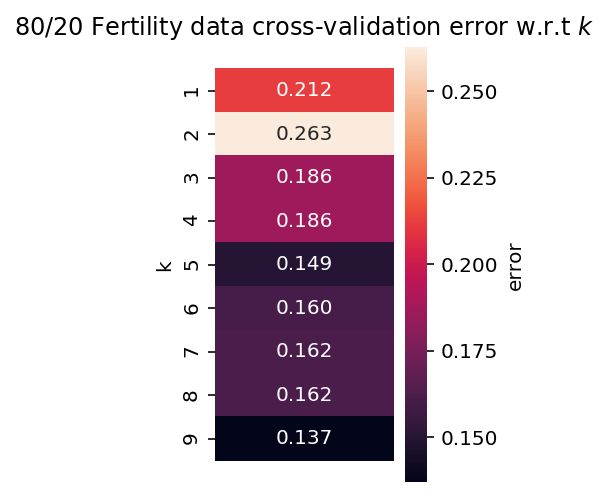

Best number of nearest neighbors (k): 9
Cross Validation Error: 0.1369607843137256
Training Error: 0.13749999999999996
Test Error: 0.050000000000000044


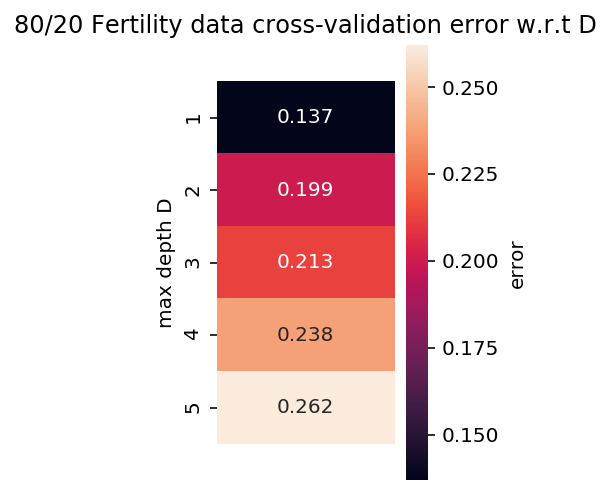

Best max depth D: 1
Cross Validation Error: 0.1369607843137256
Training Error: 0.13749999999999996
Test error: 0.050000000000000044


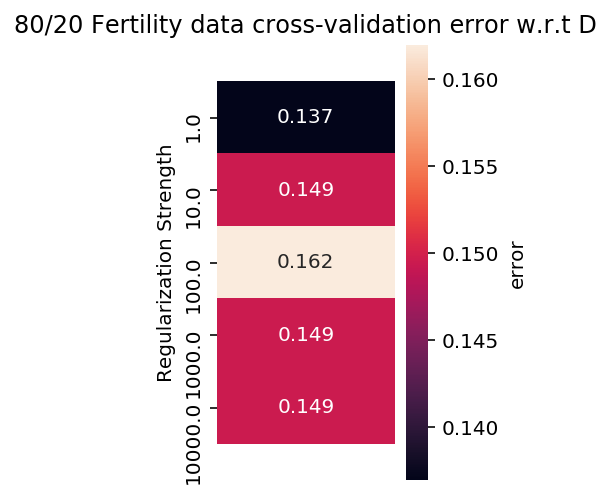

Best C (regularization strength): 1.0
Cross Validation Error: 0.1369607843137256
Training Error: 0.13749999999999996
Test error: 0.050000000000000044


C:\Users\linja\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


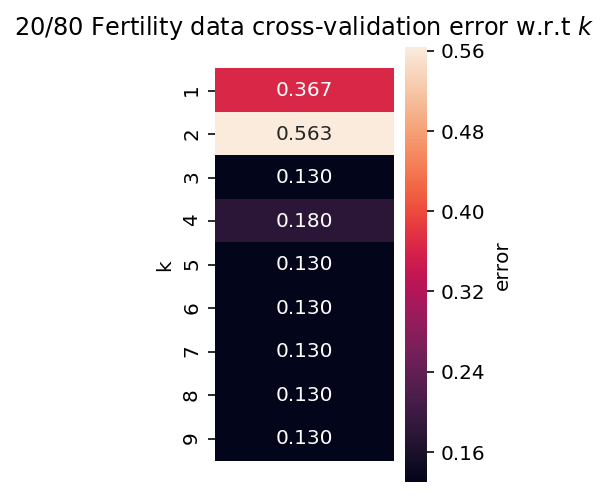

Best number of nearest neighbors (k): 3
Cross Validation Error: 0.13000000000000012
Training Error: 0.19999999999999996
Test Error: 0.11250000000000004


C:\Users\linja\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


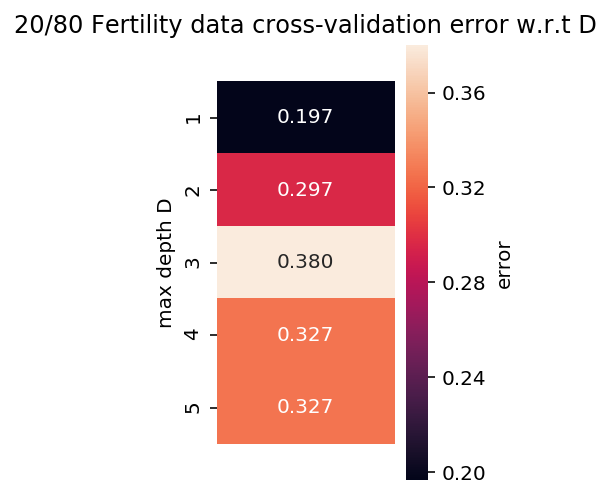

Best max depth D: 1
Cross Validation Error: 0.19666666666666666
Training Error: 0.09999999999999998
Test error: 0.17500000000000004


C:\Users\linja\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


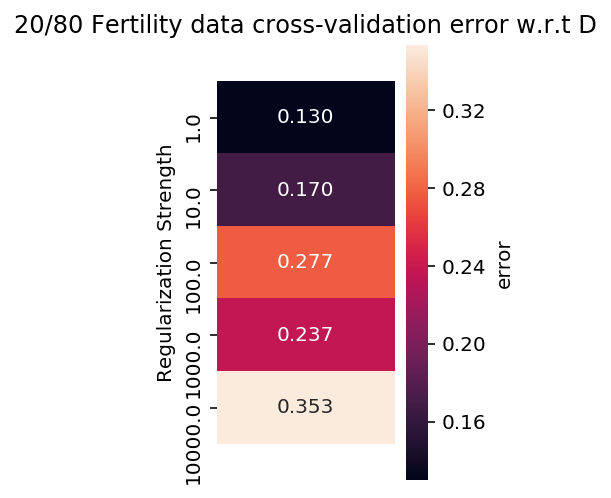

Best C (regularization strength): 1.0
Cross Validation Error: 0.13000000000000012
Training Error: 0.15000000000000002
Test error: 0.11250000000000004


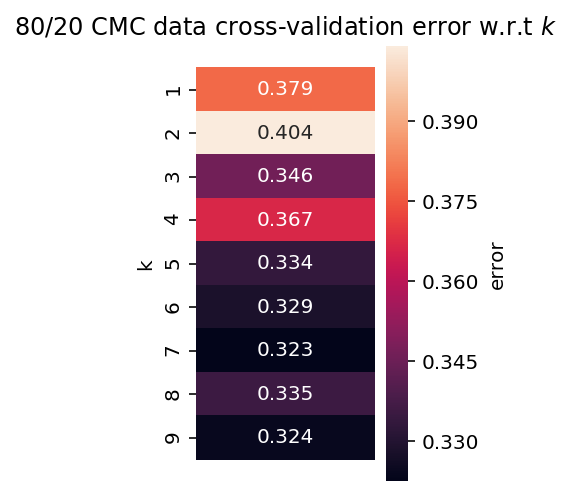

Best number of nearest neighbors (k): 7
Cross Validation Error: 0.32257482870537335
Training Error: 0.23938879456706286
Test Error: 0.28474576271186436


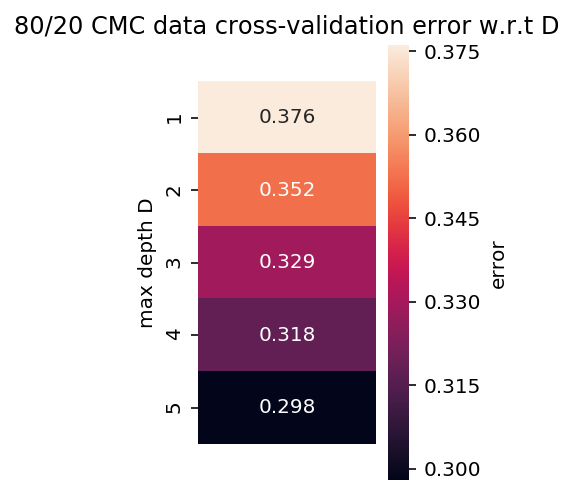

Best max depth D: 5
Cross Validation Error: 0.2979661016949152
Training Error: 0.2775891341256367
Test error: 0.2542372881355932


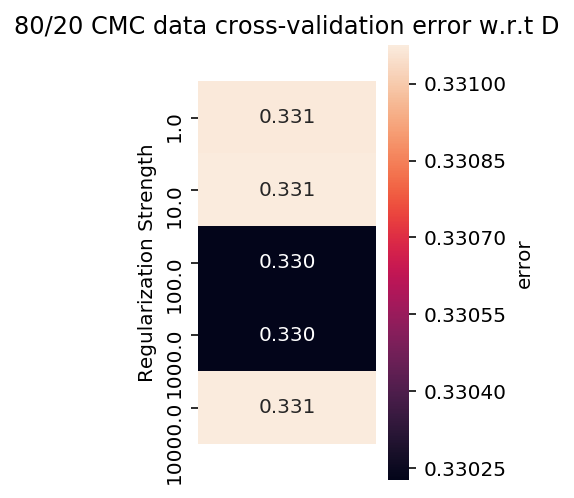

Best C (regularization strength): 100.0
Cross Validation Error: 0.3302271907681211
Training Error: 0.32258064516129037
Test error: 0.3152542372881356


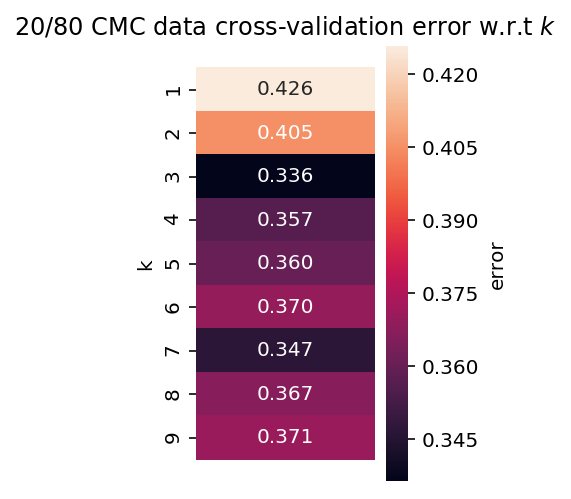

Best number of nearest neighbors (k): 3
Cross Validation Error: 0.33643678160919543
Training Error: 0.19387755102040816
Test Error: 0.3375742154368109


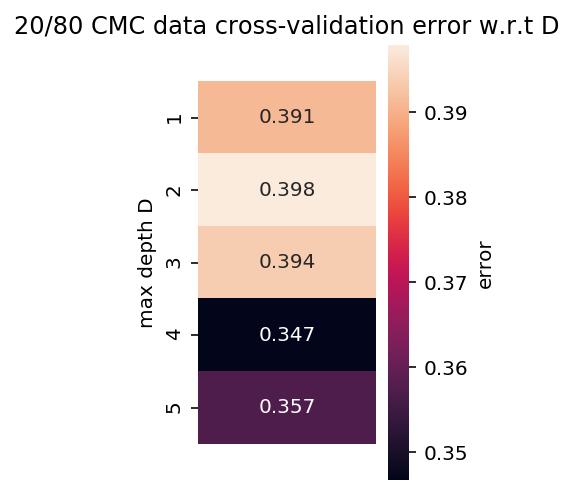

Best max depth D: 4
Cross Validation Error: 0.3466666666666667
Training Error: 0.2482993197278912
Test error: 0.31128074639525016


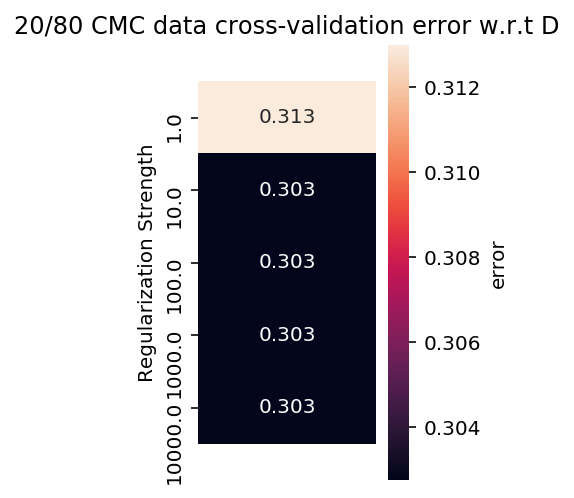

Best C (regularization strength): 10.0
Cross Validation Error: 0.3027586206896552
Training Error: 0.2925170068027211
Test error: 0.34520780322307043


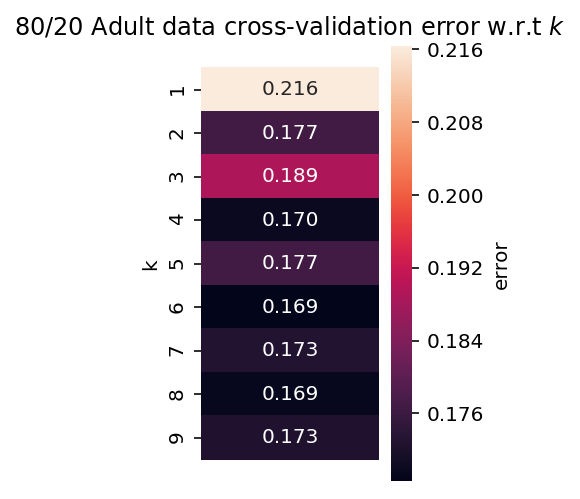

Best number of nearest neighbors (k): 6
Cross Validation Error: 0.16857366679329933
Training Error: 0.1446560196560197
Test Error: 0.160908951328113


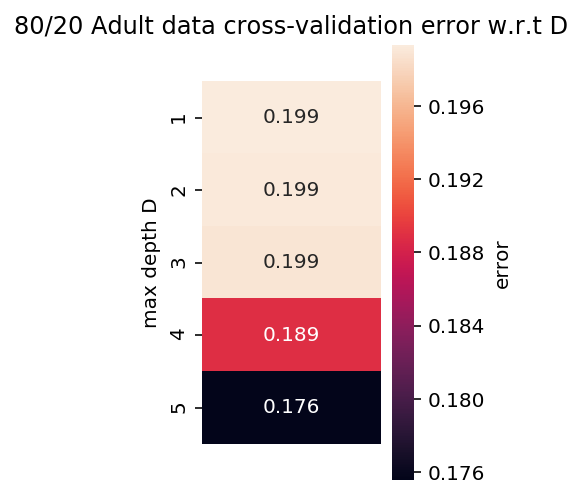

Best max depth D: 5
Cross Validation Error: 0.1755608206525764
Training Error: 0.17191339066339062
Test error: 0.1696606786427146


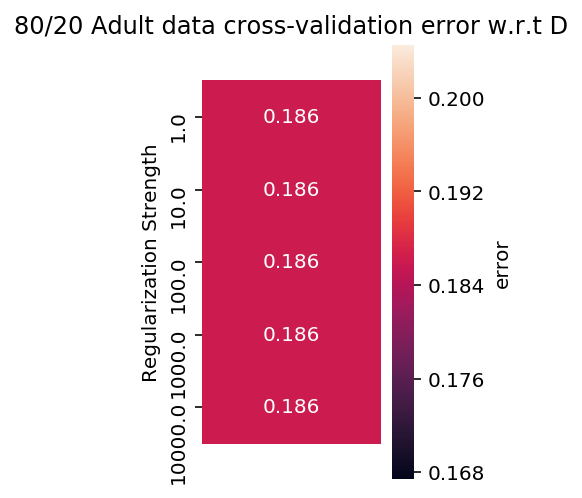

Best C (regularization strength): 1.0
Cross Validation Error: 0.18596473916213974
Training Error: 0.1860411547911548
Test error: 0.1836327345309381


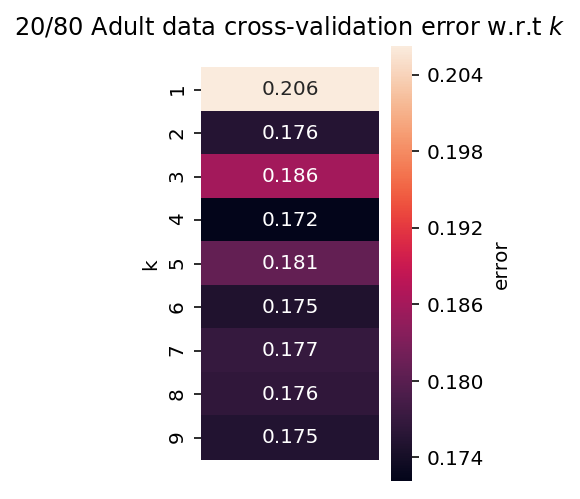

Best number of nearest neighbors (k): 4
Cross Validation Error: 0.1721423132796589
Training Error: 0.13636363636363635
Test Error: 0.17981496410610776


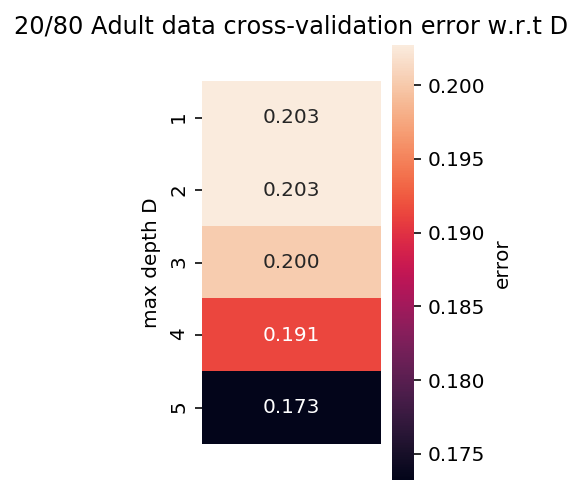

Best max depth D: 5
Cross Validation Error: 0.1732156956859363
Training Error: 0.16937960687960685
Test error: 0.17551537487043645


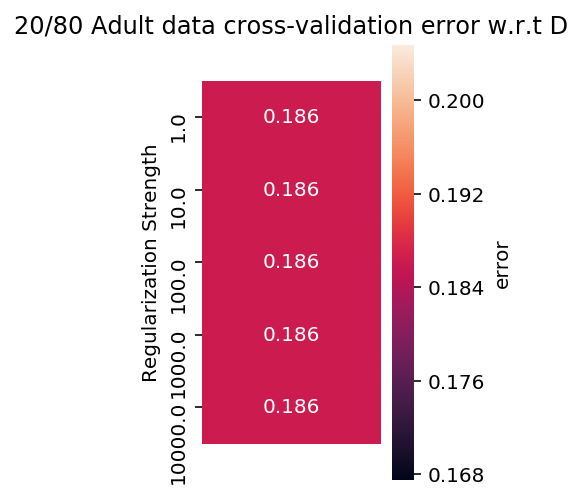

Best C (regularization strength): 1.0
Cross Validation Error: 0.1861164479906554
Training Error: 0.1875
Test error: 0.18499750470267573


In [646]:
#store all the data here
table = {}
count = 0
for i in data:
    
    #looping through fertility, cmc, adult
    if count == 0:
        name = "Fertility data"
    elif count == 1:
        name = "CMC data"
    else:
        name = "Adult data"
    count += 1

    
    np.random.shuffle(i)      # Shuffle the data.
    X = i[:, 0:-1]            # First column to second last column: Features. 
    Y = i[:, -1]              # Last column: Labels.

    #80/20 and 20/80
    size_arr = [.2, .8]
    for j in size_arr:
        
        #arrays to store the errors
        validation =[]
        training = []
        testing = []

        if j == .2:
            title = "80/20 " + name
        else:
            title = "20/80 " + name

        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=j)


        # Perform grid search for best number of nearest neighbors.

        # 1. Create a k-NN classifier.
        estimator = neighbors.KNeighborsClassifier()

        # 2. Create a grid searcher with 5-fold cross-validation.
        k_list = [1, 2, 3, 4, 5, 6, 7, 8, 9]
        param_grid = {'n_neighbors': k_list}
        grid_search = GridSearchCV(estimator, param_grid, cv=5, iid=False, return_train_score=True)

        # 3. Use the grid searcher to fit the training set.
        grid_search.fit(X_train, Y_train)

        # Draw heatmaps for result of grid search.
        def draw_heatmap(errors, D_list, title):
            plt.figure(figsize = (2,4))
            ax = sns.heatmap(errors, annot=True, fmt='.3f', yticklabels=D_list, xticklabels=[])
            ax.collections[0].colorbar.set_label('error')
            ax.set(ylabel='k')
            bottom, top = ax.get_ylim()
            ax.set_ylim(bottom + 0.5, top - 0.5)
            plt.title(title)
            plt.show()

        # Draw heatmaps of cross-validation errors (in cross-validation).
        cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
        draw_heatmap(cross_val_errors, k_list, title=title +' cross-validation error w.r.t $k$')

        # Show the best k.
        best_k = grid_search.best_params_['n_neighbors']
        print("Best number of nearest neighbors (k): {}".format(best_k))
        CV_err = 1 - grid_search.best_score_
        print("Cross Validation Error: {}".format(CV_err))


        train_err = 1 - sum(grid_search.best_estimator_.predict(X_train) == Y_train) / len(X_train)
        print("Training Error: {}".format(train_err))


        test_err = 1 - sum(grid_search.best_estimator_.predict(X_test) == Y_test) / len(X_test)
        print("Test Error: {}".format(test_err))

        validation.append(1-CV_err)
        training.append(1-train_err)
        testing.append(1-test_err)

        #Decision Tree 
        # Perform grid search for best max depth.

        estimator = tree.DecisionTreeClassifier(criterion='entropy')
        # 2. Create a grid searcher with cross-validation.
        D_list = [1, 2, 3, 4, 5]
        param_grid = {'max_depth': D_list}
        grid_search = GridSearchCV(estimator, param_grid, cv=5, iid=False, return_train_score=True)
        #fit training data
        grid_search.fit(X_train, Y_train)

        # Draw heatmaps for result of grid search.
        def draw_heatmap(errors, D_list, title):
            plt.figure(figsize = (2,4))
            ax = sns.heatmap(errors, annot=True, fmt='.3f', yticklabels=D_list, xticklabels=[])
            ax.collections[0].colorbar.set_label('error')
            ax.set(ylabel='max depth D')
            bottom, top = ax.get_ylim()
            ax.set_ylim(bottom + 0.5, top - 0.5)
            plt.title(title)
            plt.show()
        cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
        draw_heatmap(cross_val_errors, D_list, title=title +' cross-validation error w.r.t D')


        best_max_depth = grid_search.best_params_['max_depth']
        print("Best max depth D: {}".format(best_max_depth))

        # Calculate the errors

        CV_err = 1 - grid_search.best_score_
        print("Cross Validation Error: {}".format(CV_err))
        train_err = 1 - sum(grid_search.best_estimator_.predict(X_train) == Y_train) / len(X_train)
        print("Training Error: {}".format(train_err))
        test_error = 1 - sum(grid_search.best_estimator_.predict(X_test) == Y_test) / len(X_test)
        print("Test error: {}".format(test_error))

        validation.append(1-CV_err)
        training.append(1-train_err)
        testing.append(1-test_err)

        #Logistic Regression 
        # Create logistic regression
        estimator = linear_model.LogisticRegression(max_iter=7000, solver='lbfgs')
        # Create regularization hyperparameter space
        C_list = np.logspace(0, 4, 5)
        hyperparameters = {'C': C_list}
        grid_search = GridSearchCV(estimator, hyperparameters, cv=5, iid=False, return_train_score=True)
        grid_search.fit(X_train, Y_train)

        # Draw heatmaps for result of grid search.
        def draw_heatmap(errors, C_list, title):
            plt.figure(figsize = (2,4))
            ax = sns.heatmap(errors, annot=True, fmt='.3f', yticklabels=C_list, xticklabels=[])
            ax.collections[0].colorbar.set_label('error')
            ax.set(ylabel='Regularization Strength')
            bottom, top = ax.get_ylim()
            ax.set_ylim(bottom + 0.5, top - 0.5)
            plt.title(title)
            plt.show()
        cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
        draw_heatmap(cross_val_errors, C_list, title=title +' cross-validation error w.r.t D')

        best_C = grid_search.best_params_['C']
        print("Best C (regularization strength): {}".format(best_C))

        # Cross validation error
        CV_err = 1 - grid_search.best_score_
        print("Cross Validation Error: {}".format(CV_err))

        #Training error
        train_err = 1 - sum(grid_search.best_estimator_.predict(X_train) == Y_train) / len(X_train)
        print("Training Error: {}".format(train_err))

        #Test error
        test_error = 1 - sum(grid_search.best_estimator_.predict(X_test) == Y_test) / len(X_test)
        print("Test error: {}".format(test_error))

        validation.append(1-CV_err)
        training.append(1-train_err)
        testing.append(1-test_err)

        table[title + ' Validation Accuracy'] = validation
        table[title + ' Training Accuracy'] = training
        table[title + ' Testing Accuracy'] =  testing

In [647]:
df = pd.DataFrame(table, index=['KNN', 'Decision Tree', 'Logistic Regression'])
df_20_80 = df.drop(['80/20 Fertility data Validation Accuracy', '80/20 Fertility data Training Accuracy',
           '80/20 Fertility data Testing Accuracy', '80/20 CMC data Validation Accuracy', '80/20 CMC data Training Accuracy',
           '80/20 CMC data Testing Accuracy', '80/20 Adult data Validation Accuracy', '80/20 Adult data Training Accuracy',
           '80/20 Adult data Testing Accuracy'], axis=1)
df_20_80['Average Accuracy'] = df_20_80.mean(axis=1)
df_20_80 = df_20_80.round(3)
df_20_80

,20/80 Fertility data Validation Accuracy,20/80 Fertility data Training Accuracy,20/80 Fertility data Testing Accuracy,20/80 CMC data Validation Accuracy,20/80 CMC data Training Accuracy,20/80 CMC data Testing Accuracy,20/80 Adult data Validation Accuracy,20/80 Adult data Training Accuracy,20/80 Adult data Testing Accuracy,Average Accuracy
KNN,0.870,0.80,0.888,0.664,0.806,0.662,0.828,0.864,0.82,0.800
Decision Tree,0.803,0.90,0.888,0.653,0.752,0.662,0.827,0.831,0.82,0.793
Logistic Regression,0.870,0.85,0.888,0.697,0.707,0.662,0.814,0.812,0.82,0.791


In [648]:
df_80_20 = df.drop(['20/80 Fertility data Validation Accuracy', '20/80 Fertility data Training Accuracy',
           '20/80 Fertility data Testing Accuracy', '20/80 CMC data Validation Accuracy', '20/80 CMC data Training Accuracy',
           '20/80 CMC data Testing Accuracy', '20/80 Adult data Validation Accuracy', '20/80 Adult data Training Accuracy',
           '20/80 Adult data Testing Accuracy'], axis=1)
df_80_20['Average Accuracy'] = df_80_20.mean(axis=1)
df_80_20 = df_80_20.round(3)
df_80_20

,80/20 Fertility data Validation Accuracy,80/20 Fertility data Training Accuracy,80/20 Fertility data Testing Accuracy,80/20 CMC data Validation Accuracy,80/20 CMC data Training Accuracy,80/20 CMC data Testing Accuracy,80/20 Adult data Validation Accuracy,80/20 Adult data Training Accuracy,80/20 Adult data Testing Accuracy,Average Accuracy
KNN,0.863,0.862,0.95,0.677,0.761,0.715,0.831,0.855,0.839,0.817
Decision Tree,0.863,0.862,0.95,0.702,0.722,0.715,0.824,0.828,0.839,0.812
Logistic Regression,0.863,0.862,0.95,0.670,0.677,0.715,0.814,0.814,0.839,0.801


In [649]:
df_rank = pd.DataFrame()
df_rank["Rank 20/80"] = df_20_80["Average Accuracy"].rank(ascending=0)
df_rank["Rank 80/20"] = df_80_20["Average Accuracy"].rank(ascending=0)
df_rank

,Rank 20/80,Rank 80/20
KNN,1.0,1.0
Decision Tree,2.0,2.0
Logistic Regression,3.0,3.0
